<br>
<font size=6><b>Homework 3 - Lasso and Ridge</b></font>

**Learning Team 4** <br>
Names: 
- Camacho, Kashmirr
- Carandang, Kristine Ann
- Diamada, Weddy
- Gacal, John Francis
- Gaspar, Manuel John Paul
- Gonzales, Joaquin Emmanuel

**Instructions:** <br>
(per Learning Team) On Ridge and Lasso implementation for Boston Housing Data Set (20 pts, Due: 10 August 2021 11:59 pm [PHL/SG time])

1. Implement Ridge and Lasso for the Boston Housing data using only the 13 original parameters (no derived variables).[7 pts]  Comment on resulting accuracy and optimal alpha.[3 pts] 

2. Implement Ridge and Lasso for the Parkinson's data set. [7 pts] Comment on resulting accuracy and optimal alpha. [3 pts]

In [1]:
# Preliminaries
# Prettify the notebook
import warnings
warnings.filterwarnings("ignore")  
import warnings
def showwarning(*args, **kwargs):
    if args[1] is DeprecationWarning:
        return
    warnings._showwarning_orig(*args, **kwargs)
warnings.showwarning = showwarning

# Install mglearn
!pip install mglearn

#Import packages
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.4g}'.format

## Boston Housing Data

### Ridge Regression

#### Implementation

In [2]:
# Import Boston Housing Data and Print shape
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
# Load the feature variables
df = pd.DataFrame.from_dict(boston['data'])

# Add the feature_names as column labels
df.columns = boston['feature_names'] 

# Add the target as additional column
df['Target'] = boston['target'] 

# Display the first 5 rows
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.967,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.967,2,242,17.8,392.8,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.062,3,222,18.7,394.6,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.062,3,222,18.7,396.9,5.33,36.2


In [4]:
# Load dataset characteristics
print("Feature names: \n{}".format(boston.feature_names))
print(boston.DESCR)

Feature names: 
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibili

In [5]:
# Load data (without the derived features)
X, y = boston['data'], boston['target'] 

In [6]:
# Import Ridge regression package
from sklearn.linear_model import Ridge

# Run Ridge model for 100 iterations on different alpha_ridge values
all_training = pd.DataFrame()
all_test = pd.DataFrame()

alpha_ridge = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2, 0.5, 0.75, 1, 1.5, 3, 10, 20, 30, 50, 100] # arbitrary
num_trials = 100

for seedN in range(1, num_trials+1, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []

    for alpha_run in alpha_ridge:
        ridge = Ridge(alpha=alpha_run, max_iter=1_000_000).fit(X_train, y_train)
        training_accuracy.append(ridge.score(X_train, y_train))
        test_accuracy.append(ridge.score(X_test, y_test))
        
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

print("TRAIN SET: Mean = ", np.mean(training_accuracy), " Stdev = ", np.std(training_accuracy))
print(" TEST SET: Mean = ", np.mean(test_accuracy)," Stdev = ", np.std(test_accuracy))

TRAIN SET: Mean =  0.7380589570023859  Stdev =  0.006311153748490327
 TEST SET: Mean =  0.7152047915561901  Stdev =  0.010273097846942206


In [7]:
# Display train and test accuracy at each level of alpha
ridge_boston = pd.DataFrame([alpha_ridge, all_training.mean(axis=1), all_test.mean(axis=1)]).T
ridge_boston.columns = ['Alpha Ridge', 'Train Accuracy', 'Test Accuracy']
ridge_boston

,Alpha Ridge,Train Accuracy,Test Accuracy
0,1e-05,0.7432,0.7131
1,0.0001,0.7432,0.7131
2,0.001,0.7432,0.7131
3,0.007,0.7432,0.7131
4,0.01,0.7432,0.7131
5,0.05,0.7432,0.7131
6,0.1,0.7432,0.713
7,0.2,0.743,0.7127
8,0.5,0.7422,0.7118
9,0.75,0.7415,0.711


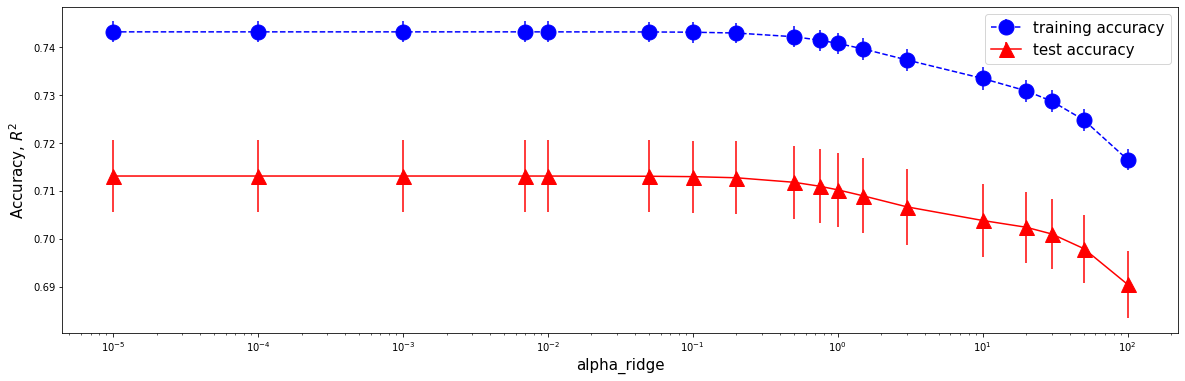

In [8]:
# Plot the accuracy and alpha_ridge for 100 iterations 
fig = plt.figure(figsize=(20, 6))
import pylab as plot
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.errorbar(alpha_ridge, all_training.mean(axis=1),
             yerr=all_training.std(axis=1)/6, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(alpha_ridge, all_test.mean(axis=1),
             yerr=all_test.std(axis=1)/6, label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy, $R^2$", fontsize=15)
plt.xlabel("alpha_ridge",fontsize=15)
plt.legend()

In [9]:
# Resulting optimal alpha and test accuracy at 100 iterations
optimal_alpha_index = all_test.mean(axis=1).idxmax()
optimal_alpha       = alpha_ridge[optimal_alpha_index]
test_optimal        = all_test.mean(axis=1)[optimal_alpha_index]

print(f'     Optimal alpha_ridge = {optimal_alpha}')
print(f'Corresponding avg test score = {test_optimal}')

     Optimal alpha_ridge = 1e-05
Corresponding avg test score = 0.7131018920790995


(-1.0, 13.0)

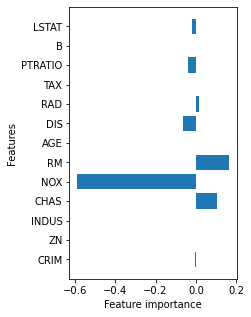

In [10]:
# Plot the feature importance at optimal alpha
param=optimal_alpha
ridge_optimal = Ridge(alpha=param).fit(X_train, y_train)
weights_normalized = ridge_optimal.coef_.T/np.sum(np.abs(ridge_optimal.coef_.T)) # optimal alpha

import numpy as np
fig = plt.figure(figsize=(3, 5))
n_features = X.shape[1]
plt.barh(range(n_features), weights_normalized, align='center')
plt.yticks(np.arange(n_features), boston.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)

#### Resulting accuracy and optimal alpha (Ridge)

Removing the derived features, we fitted the Ridge Regession Model to the Boston dataset. We ran the model for *100* iterations on different `alpha_ridge` values that were suggested in class. The results are as follows:

- Optimal `alpha_ridge` = 1e-05 <br>
- Test score $R^2$ (Ridge) = 0.7131018920790995
- Test score $R^2$ (Linear regression) = 0.7129855993166657 [as discussed in class]

The optimal `alpha_ridge` is 1e-05 which is close to 0. At this small `alpha_ridge` value, the model approaches the behavior of a linear regression with both test scores approximating 71.3% (see bullets above). It can be observed that the training and test accuracy lines in the plot does not appear to converge at any level of `alpha_ridge`. 

The dismal test and training accuracy (< 75%) give an indication of possible underfitting, hence, exploring feature engineering techniques may help improve model performance. Lastly, we  noted that the top predictor of the model is `NOX`, the proxy for air pollution, as seen in the plot `Feature importance` on. This is the same top predictor in the Linear regression model. 

### Lasso Regression

#### Implementation

In [11]:
# Load data (without the derived features)
X, y = boston['data'], boston['target']

In [12]:
# Import Lasso regression package
from sklearn.linear_model import Lasso

# Run the Lasso model on default alpha=1.0
lasso_default = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso_default.score(X_train, y_train))
print("test set score: %f" % lasso_default.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso_default.coef_ !=0))

training set score: 0.683849
test set score: 0.657718
number of features used: 10


In [13]:
# Run Lasso model for 100 iterations on different alpha_lasso values
all_training = pd.DataFrame()
all_test = pd.DataFrame()
alpha_lasso = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2, 0.5, 0.75, 1, 1.5, 3, 10, 20, 30, 50, 100] # arbitrary
num_trials = 100

for seedN in range(1, num_trials+1, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    for alpha_run in alpha_lasso:
        lasso = Lasso(alpha=alpha_run, max_iter=1_000_000).fit(X_train, y_train)
        training_accuracy.append(lasso.score(X_train, y_train))
        test_accuracy.append(lasso.score(X_test, y_test))
    all_training[seedN] = training_accuracy
    all_test[seedN] = test_accuracy

In [14]:
# Display train and test accuracy at each level of alpha
lasso_boston = pd.DataFrame([alpha_lasso, all_training.mean(axis=1), all_test.mean(axis=1)]).T
lasso_boston.columns = ['Alpha Lasso', 'Train Accuracy', 'Test Accuracy']
lasso_boston

,Alpha Lasso,Train Accuracy,Test Accuracy
0,1e-05,0.7432,0.7131
1,0.0001,0.7432,0.7131
2,0.001,0.7432,0.7131
3,0.007,0.743,0.7126
4,0.01,0.7428,0.7123
5,0.05,0.7333,0.7011
6,0.1,0.7301,0.6997
7,0.2,0.7256,0.6981
8,0.5,0.7161,0.6886
9,0.75,0.7029,0.6739


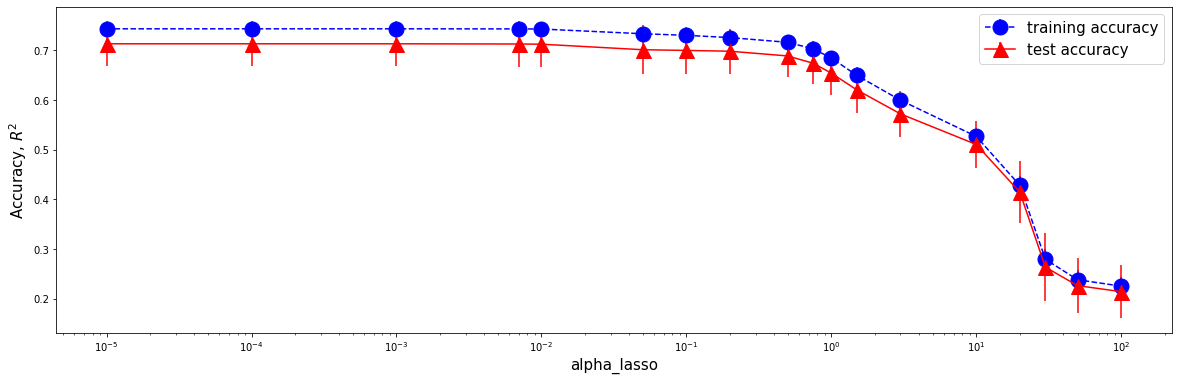

In [15]:
# Plot the accuracy and alpha_ridge for 100 iterations 
fig = plt.figure(figsize=(20, 6))
import pylab as plot
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.errorbar(alpha_lasso, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(alpha_lasso, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy, $R^2$", fontsize=15)
plt.xlabel("alpha_lasso",fontsize=15)
plt.legend()

In [16]:
# Resulting optimal alpha and test accuracy at 100 iterations
optimal_alpha_index = all_test.mean(axis=1).idxmax()
optimal_alpha       = alpha_lasso[optimal_alpha_index]
test_optimal        = all_test.mean(axis=1)[optimal_alpha_index]

print(f'         Optimal alpha_lasso = {optimal_alpha}')
print(f'Corresponding avg test score = {test_optimal}')

         Optimal alpha_lasso = 1e-05
Corresponding avg test score = 0.7131015989484233


number of features used: 13


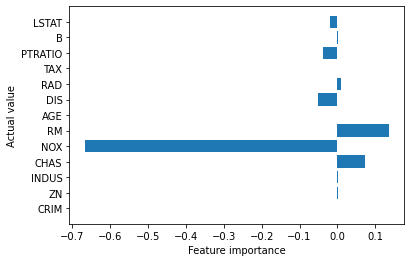

In [17]:
# Using optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lasso_optimal = Lasso(alpha=optimal_alpha, max_iter=1_000_000).fit(X_train, y_train)
print("number of features used: %d" % np.sum(lasso_optimal.coef_ !=0))

weights_normalized = lasso_optimal.coef_.T/np.sum(np.abs(lasso_optimal.coef_.T))
X = pd.DataFrame(X)
plt.barh(range(X.shape[1]), weights_normalized, align='center')
plt.yticks(np.arange(X.shape[1]), boston.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Actual value")
plt.ylim(-1,X.shape[1])
plt.show()

All 13 features were used in Lasso.

#### Resulting accuracy and optimal alpha (Lasso)

Removing the derived features, we fitted the Lasso Regession Model to the Boston dataset. We ran the model for *100* iterations on different `alpha_lasso` values that were suggested in class. The results are as follows:

- Optimal `alpha_lasso` = 1e-05 <br>
- Test score $R^2$ (Lasso) = 0.7131015989484233
- Test score $R^2$ (Linear regression) = 0.7129855993166657 [as discussed in class]

Similar to the Ridge Regression Model, the optimal `alpha_lasso` is 1e-05 which is close to 0. It can be seen above that this performs equally to that of the Linear regression. (see bullets above). 

The insights are still the same as the Ridge model. The dismal test and training accuracy (< 75%) give an indication of possible underfitting, hence, exploring feature engineering techniques may help improve model performance. Lastly, we noted that the model used all **13** variables in the dataset at the optimal alpha. `NOX` remains the top predictor.

## Parkinson's data set

### Ridge Regression

#### Implementation

In [18]:
# Import the Parkinson's Dataset and Print shape
df_parkinsons = pd.read_excel('parkinsons_updrs.xlsx', sheet_name="parkinsons_updrs")
dummy = df_parkinsons
print(dummy.shape)

(5875, 22)


In [19]:
# Remove the target column X
df_features = dummy.drop('Target', axis=1)
df_features = df_features 

# Display the first 5 rows
df_features.head()

,subject#,age,sex,test_time,motor_score,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.643,28.2,0.00662,3.38e-05,0.00401,0.00317,0.01204,...,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.4189,0.5484,0.1601
1,1,72,0,12.67,28.45,0.003,1.68e-05,0.00132,0.0015,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.01111,27.18,0.4349,0.5648,0.1081
2,1,72,0,19.68,28.7,0.00481,2.462e-05,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.02022,23.05,0.4622,0.5441,0.2101
3,1,72,0,25.65,28.91,0.00528,2.657e-05,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.02784,24.45,0.4873,0.5779,0.3328
4,1,72,0,33.64,29.19,0.00335,2.014e-05,0.00093,0.0013,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.01162,26.13,0.4719,0.5612,0.1936


In [20]:
# Load data
X, y = df_features, df_parkinsons['Target'] 

In [21]:
# Run Ridge model for 100 iterations on different alpha_ridge values
all_training = pd.DataFrame()
all_test = pd.DataFrame()
from sklearn.linear_model import Ridge
alpha_ridge = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2, 0.5, 0.75, 1, 1.5, 3, 10, 20, 30, 50, 100] # arbitrary
num_trials = 100 

for seedN in range(1, num_trials, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []

    for alpha_run in alpha_ridge:
        ridge = Ridge(alpha=alpha_run, max_iter=1_000_000).fit(X_train, y_train)
        training_accuracy.append(ridge.score(X_train, y_train))
        test_accuracy.append(ridge.score(X_test, y_test))
        
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

print("TRAIN SET: Mean = ", np.mean(training_accuracy), " Stdev = ", np.std(training_accuracy))
print(" TEST SET: Mean = ", np.mean(test_accuracy)," Stdev = ", np.std(test_accuracy))

TRAIN SET: Mean =  0.9084308366131365  Stdev =  0.0008368037473871279
 TEST SET: Mean =  0.9084343154328658  Stdev =  0.0005074120721600304


In [22]:
# Display train and test accuracy at each level of alpha
ridge_parkinson = pd.DataFrame([alpha_ridge, all_training.mean(axis=1), all_test.mean(axis=1)]).T
ridge_parkinson.columns = ['Alpha Ridge', 'Train Accuracy', 'Test Accuracy']
ridge_parkinson

,Alpha Ridge,Train Accuracy,Test Accuracy
0,1e-05,0.9097,0.9088
1,0.0001,0.9096,0.9088
2,0.001,0.9096,0.9088
3,0.007,0.9094,0.9087
4,0.01,0.9093,0.9086
5,0.05,0.909,0.9084
6,0.1,0.9089,0.9083
7,0.2,0.9088,0.9082
8,0.5,0.9085,0.9081
9,0.75,0.9084,0.908


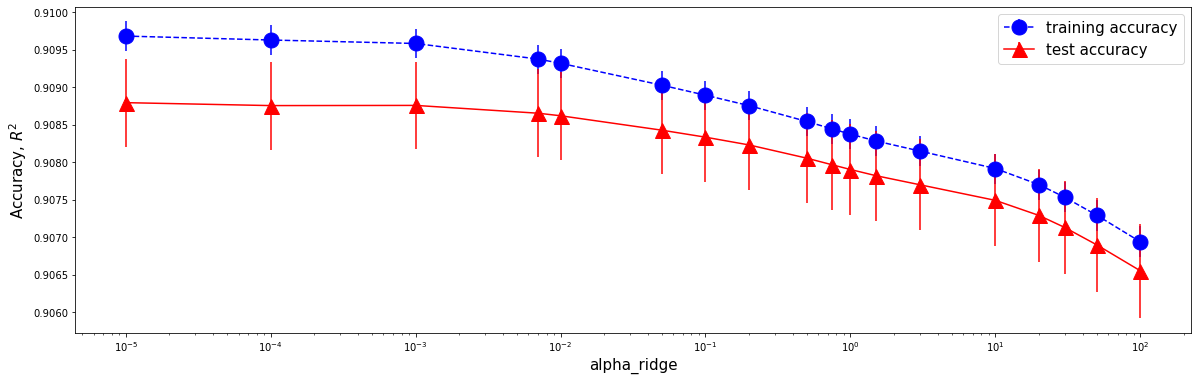

In [23]:
# Plot the accuracy and alpha_ridge for 100 iterations 
fig = plt.figure(figsize=(20, 6))
import pylab as plot
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.errorbar(alpha_ridge, all_training.mean(axis=1),
             yerr=all_training.std(axis=1)/6, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(alpha_ridge, all_test.mean(axis=1),
             yerr=all_test.std(axis=1)/6, label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy, $R^2$", fontsize=15)
plt.xlabel("alpha_ridge",fontsize=15)
plt.legend()

In [24]:
# Resulting optimal alpha and test accuracy at 100 iterations
optimal_alpha_index = all_test.mean(axis=1).idxmax()
optimal_alpha       = alpha_ridge[optimal_alpha_index]
test_optimal        = all_test.mean(axis=1)[optimal_alpha_index]

print(f'     Optimal alpha_ridge = {optimal_alpha}')
print(f'Corresponding test score = {test_optimal}')

     Optimal alpha_ridge = 1e-05
Corresponding test score = 0.908794055490406


(-1.0, 21.0)

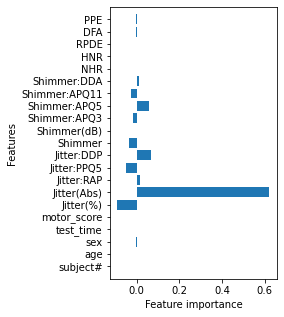

In [25]:
# Plot the feature importance at optimal alpha
param=optimal_alpha
ridge_optimal = Ridge(alpha=param).fit(X_train, y_train)
weights_normalized = ridge_optimal.coef_.T/np.sum(np.abs(ridge_optimal.coef_.T)) # optimal alpha

import numpy as np
fig = plt.figure(figsize=(3, 5))
n_features = X.shape[1]
plt.barh(range(n_features), weights_normalized, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)

#### Resulting accuracy and optimal alpha (Ridge)

We fitted the Ridge Regession Model to the Parkinson's dataset. We ran the model for *100* iterations on different `alpha_ridge` values that were suggested in class. The results are as follows:

- Optimal `alpha_ridge` = 1e-05 <br>
- Test score $R^2$ (Ridge) = 0.908794055490406
- Test score $R^2$ (Linear regression) = 0.9089324614040405   [see Appendix]

The optimal `alpha_ridge` is 1e-05 which is close to 0. At this small `alpha_ridge` value, the model approaches the behavior of a linear regression. The Ridge regression test score is at 90.87% which approximates Linear Regression at 90.89% (see bullets above). Unlike the Boston dataset's Ridge model which does not show apparent convergence of train/test lines, we observed that the training and test accuracy lines for the Ridge model start to converge at around `alpha_ridge` = $10^0$ (see the plot).

The high and closely-knitted test and training accuracy (~91%) gives an indication that there is no overfitting. However, exploring feature engineering techniques may further help improve model performance. Lastly, we  noted that the top predictor of the model is `Jitter(ABS)`, one of the voice perturbation paramaters, as seen in the plot on `Feature importance`.

### Lasso Regression

#### Implementation

In [26]:
# Load data
X, y = df_features, df_parkinsons['Target']

In [27]:
# Import Lasso regression package
from sklearn.linear_model import Lasso

# Run the Lasso model on default alpha=1.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lasso_default = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso_default.score(X_train, y_train))
print("test set score: %f" % lasso_default.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso_default.coef_ !=0))

training set score: 0.901081
test set score: 0.897644
number of features used: 4


In [28]:
# Run Lasso model for 100 iterations on different alpha_lasso values
all_training = pd.DataFrame()
all_test = pd.DataFrame()

alpha_lasso = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2, 0.5, 0.75, 1, 1.5, 3, 10, 20, 30, 50, 100] # arbitrary
num_trials = 100

for seedN in range(1, num_trials, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    for alpha_run in alpha_lasso:
        lasso = Lasso(alpha=alpha_run, max_iter=1_000_000).fit(X_train, y_train)
        training_accuracy.append(lasso.score(X_train, y_train))
        test_accuracy.append(lasso.score(X_test, y_test))
    all_training[seedN] = training_accuracy
    all_test[seedN] = test_accuracy

In [29]:
# Display train and test accuracy at each level of alpha
lasso_parkinson = pd.DataFrame([alpha_lasso, all_training.mean(axis=1), all_test.mean(axis=1)]).T
lasso_parkinson.columns = ['Alpha Lasso', 'Train Accuracy', 'Test Accuracy']
lasso_parkinson

,Alpha Lasso,Train Accuracy,Test Accuracy
0,1e-05,0.9096,0.9088
1,0.0001,0.9092,0.9085
2,0.001,0.9085,0.9079
3,0.007,0.9077,0.9072
4,0.01,0.9074,0.9069
5,0.05,0.9061,0.9058
6,0.1,0.9058,0.9054
7,0.2,0.9044,0.904
8,0.5,0.9006,0.9002
9,0.75,0.9005,0.9001


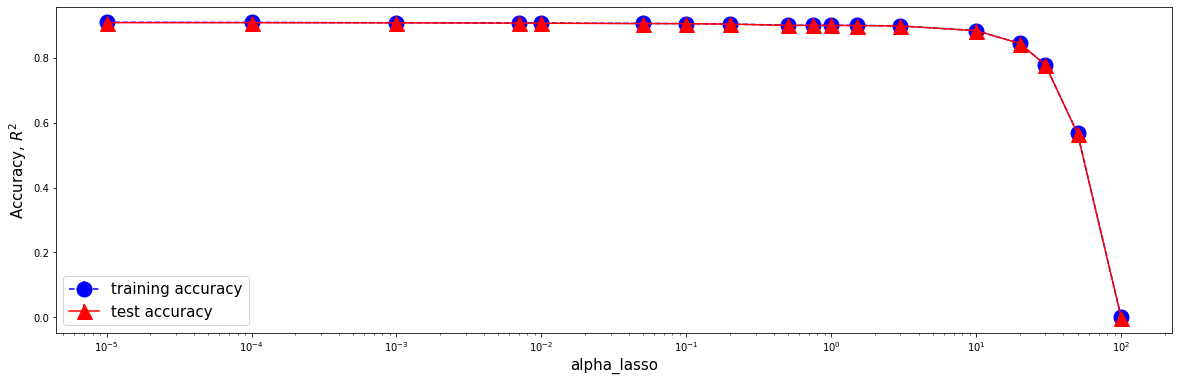

In [30]:
# Plot the accuracy and alpha_ridge for 100 iterations 
fig = plt.figure(figsize=(20, 6))
import pylab as plot
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.errorbar(alpha_lasso, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(alpha_lasso, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy, $R^2$", fontsize=15)
plt.xlabel("alpha_lasso",fontsize=15)
plt.legend()

In [31]:
# Resulting optimal alpha and test accuracy at 100 iterations
optimal_alpha_index = all_test.mean(axis=1).idxmax()
optimal_alpha       = alpha_lasso[optimal_alpha_index]
test_optimal        = all_test.mean(axis=1)[optimal_alpha_index]

print(f'     Optimal alpha_lasso = {optimal_alpha}')
print(f'Corresponding avg test score = {test_optimal}')

     Optimal alpha_lasso = 1e-05
Corresponding avg test score = 0.9087598717611199


number of features used: 18


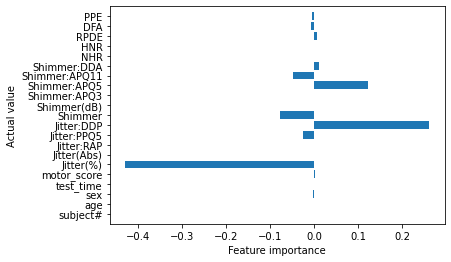

In [32]:
#using optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lasso_optimal = Lasso(alpha=optimal_alpha, max_iter=1_000_000).fit(X_train, y_train)
print("number of features used: %d" % np.sum(lasso_optimal.coef_ !=0))

weights_normalized = lasso_optimal.coef_.T/np.sum(np.abs(lasso_optimal.coef_.T))
X = pd.DataFrame(X)
plt.barh(range(X.shape[1]), weights_normalized, align='center')
plt.yticks(np.arange(X.shape[1]), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Actual value")
plt.ylim(-1, X.shape[1])
plt.show()

#### Resulting accuracy and optimal alpha (Lasso)

We fitted the Lasso Regession Model to the Parkinson's dataset. We ran the model for *100* iterations on different `alpha_lasso` values that were suggested in class. The results are as follows:

- Optimal `alpha_lasso` = 1e-05 <br>
- Test score $R^2$ (Lasso) = 0.9087598717611199
- Test score $R^2$ (Linear regression) = 0.9089324614040405   [see Appendix]

The optimal `alpha_lasso` is 1e-05 which is close to 0. It can be seen above that this performs almost the same as Ridge regession and Linear regression. We also noted that for alpha values of 0.1 and below, the training and test accuracy are tightly knitted together at around 91% (see plot above). This indicates that there is no overfitting. 

Exploring feature engineering techniques may help improve model performance. Lastly, we noted that the model only used **18** out of 20 variables in the dataset (2 variables were dropped). This is because Lasso has a regularization parameter alpha that controls how strongly the coefficients are pushed towards zero. The list of the variables that were included are shown in the next cell.

In [33]:
print('Total number of non-zero weights: ', sum(lasso_optimal.coef_.T != 0))
relevant_cols = [j for i, j in zip(lasso_optimal.coef_, X.columns) if i != 0]
print('List of relevant columns are: ', relevant_cols)

Total number of non-zero weights:  18
List of relevant columns are:  ['subject#', 'age', 'sex', 'test_time', 'motor_score', 'Jitter(%)', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


## Appendix

In [34]:
# Linear regression on Parkinson's dataset for comparison to Ridge and Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
training_accuracy = []
test_accuracy = []
    

for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    lr = LinearRegression().fit(X_train, y_train)

    training_accuracy.append(lr.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(lr.score(X_test, y_test))   # record generalization accuracy


print("TRAIN SET: Mean = ", np.mean(training_accuracy), " Stdev = ", np.std(training_accuracy))
print(" TEST SET: Mean = ", np.mean(test_accuracy)," Stdev = ", np.std(test_accuracy))

TRAIN SET: Mean =  0.9101045782105971  Stdev =  0.0011707791803451297
 TEST SET: Mean =  0.9089324614040405  Stdev =  0.003598316943670498
